<a href="https://colab.research.google.com/github/AhmedZeer/ml.py/blob/master/12_PyTorchIntro_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

## Tensors and NumPy arrays.

In [ ]:
arr = [1,2,3]
n_arr = np.array(arr)
n_arr

In [ ]:
t_arr = torch.tensor(n_arr)
t_arr

tensor([1, 2, 3])

In [ ]:
arr = [1,2,3]
n_arr = np.array(arr, dtype=np.int32)
arr

[1, 2, 3]

In [ ]:
t_arr = torch.from_numpy(n_arr)
t_arr

tensor([1, 2, 3], dtype=torch.int32)

In [ ]:
t_ones = torch.ones(2,3)
print(t_ones.shape)
t_ones

torch.Size([2, 3])


tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
rand_tens = torch.rand(5,3)
rand_tens

tensor([[0.4730, 0.3986, 0.5077],
        [0.0907, 0.3898, 0.9221],
        [0.4322, 0.8441, 0.6097],
        [0.1121, 0.1575, 0.4483],
        [0.0803, 0.7405, 0.1513]])

## Tensors Operations( Transpose, Squeeze, MatrixMul )

In [ ]:
torch.transpose(rand_tens,0,1)

tensor([[0.4730, 0.0907, 0.4322, 0.1121, 0.0803],
        [0.3986, 0.3898, 0.8441, 0.1575, 0.7405],
        [0.5077, 0.9221, 0.6097, 0.4483, 0.1513]])

In [ ]:
t = torch.zeros(30)
t.reshape(5,6)

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

In [ ]:
t = torch.zeros(3,1,3,1,3,1,1)
t = torch.squeeze(t)
t

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

In [ ]:
torch.manual_seed(0)
t_rand = torch.rand(2,1)
t_1 = t_rand * 10 + 20
t_2 = torch.normal(mean=0, std = 1, size=(2,2))
torch.multiply(t_2, t_1)

tensor([[ -7.2519, -26.7192],
        [ 35.0030, -19.0295]])

In [ ]:
torch.matmul( torch.transpose(t_1,0,1), t_2 )

tensor([[ 27.7512, -45.7487]])

In [ ]:
t_4 = torch.matmul( t_1.reshape(1,2), torch.transpose(t_2,0,1))

In [ ]:
torch.linalg.norm(t_4, ord=2, dim=1)

tensor([38.9539])

## Tensor ( Split, Concat, Stack )

In [ ]:
t = torch.rand(6)
t_splitted = torch.split(t,2)
[obj for obj in t_splitted]

[tensor([0.3489, 0.4017]), tensor([0.0223, 0.1689]), tensor([0.2939, 0.5185])]

In [ ]:
t_splitted = torch.split(t, split_size_or_sections=(3,1,2))
[obj for obj in t_splitted]

[tensor([0.3489, 0.4017, 0.0223]), tensor([0.1689]), tensor([0.2939, 0.5185])]

In [ ]:
A = torch.ones(3)
B = torch.zeros(3)
C = torch.stack([A,B], axis = 0)
D = torch.stack([A,B], axis = 1)
E = torch.cat([A,B], axis = 0)
print(C)
print(D)
print(E)

tensor([[1., 1., 1.],
        [0., 0., 0.]])
tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])
tensor([1., 1., 1., 0., 0., 0.])


## Dataloaders

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
t = torch.arange(6, dtype=torch.float32)
t

tensor([0., 1., 2., 3., 4., 5.])

In [ ]:
help(DataLoader)

In [ ]:
data_loader = DataLoader(t, batch_size = 4, drop_last = True)
for data in data_loader:
  print(data)

tensor([0., 1., 2., 3.])


In [ ]:
X = torch.rand(size=(3,4))
y = torch.arange(3)
print(X)
print(y)

tensor([[0.9527, 0.0362, 0.1852, 0.3734],
        [0.3051, 0.9320, 0.1759, 0.2698],
        [0.1507, 0.0317, 0.2081, 0.9298]])
tensor([0, 1, 2])


In [ ]:
from torch.utils.data import Dataset

class JoinData(Dataset):
  def __init__(self,x,y):
    self.x = x
    self.y = y

  def __len__(self,):
    return len(self.x)

  def __getitem__(self,idx):
    return(self.x[idx],self.y[idx])

In [ ]:
data = JoinData(X,y)

In [ ]:
for (x,y) in data:
  print(f"X: {x} \t y: {y} ")

X: tensor([0.9527, 0.0362, 0.1852, 0.3734]) 	 y: 0 
X: tensor([0.3051, 0.9320, 0.1759, 0.2698]) 	 y: 1 
X: tensor([0.1507, 0.0317, 0.2081, 0.9298]) 	 y: 2 


In [ ]:
len(data)

3

In [ ]:
data_loader = DataLoader( dataset = data, shuffle = True, batch_size = 3 )

In [ ]:
for (X,y) in data_loader:
  print(X,"|",y)

tensor([[0.3051, 0.9320, 0.1759, 0.2698],
        [0.1507, 0.0317, 0.2081, 0.9298],
        [0.9527, 0.0362, 0.1852, 0.3734]]) | tensor([1, 2, 0])


In [ ]:
for e in range(3):
  for (X,y) in data_loader:
    print(X,"|",y)

tensor([[0.1507, 0.0317, 0.2081, 0.9298],
        [0.9527, 0.0362, 0.1852, 0.3734],
        [0.3051, 0.9320, 0.1759, 0.2698]]) | tensor([2, 0, 1])
tensor([[0.9527, 0.0362, 0.1852, 0.3734],
        [0.1507, 0.0317, 0.2081, 0.9298],
        [0.3051, 0.9320, 0.1759, 0.2698]]) | tensor([0, 2, 1])
tensor([[0.9527, 0.0362, 0.1852, 0.3734],
        [0.3051, 0.9320, 0.1759, 0.2698],
        [0.1507, 0.0317, 0.2081, 0.9298]]) | tensor([0, 1, 2])


## Load From Local

In [ ]:
import pathlib
imgdir = pathlib.Path("/content/machine-learning-book/ch12/cat_dog_images")

In [ ]:
file_list = sorted([str(dir) for dir in imgdir.glob('*.jpg')])

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

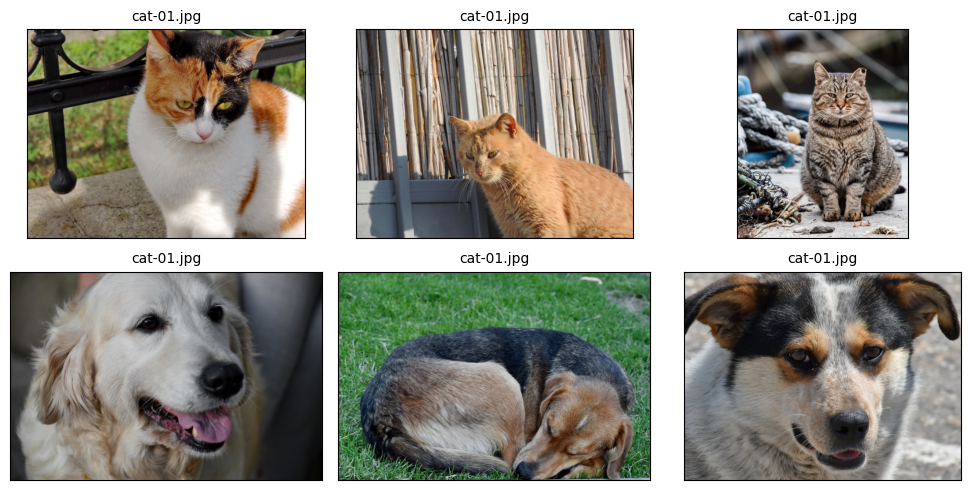

In [ ]:
fig = plt.figure(figsize=(10,5))
for i, path in enumerate(file_list):
  img = Image.open(path)
  ax = fig.add_subplot(2,3,i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(os.path.basename(file_list[0]), size = 10)
  ax.imshow(img)
  plt.tight_layout()
plt.show()

In [ ]:
labels = [ 1 if 'dog' in os.path.basename(path) else 0 for path in file_list ]

In [ ]:
labels

[0, 0, 0, 1, 1, 1]

In [ ]:
class ImageDataset(Dataset):
  def __init__( self, file_path, labels):
    self.file_path = file_path
    self.labels = labels

  def __getitem__(self,i):
    return( self.file_path[i], self.labels[i] )

  def __len__(self):
    return len(self.labels)

In [ ]:
image_dataset = ImageDataset(file_list, labels)

In [ ]:
for path,label in image_dataset:
  print(path,"|",label)

/content/machine-learning-book/ch12/cat_dog_images/cat-01.jpg | 0
/content/machine-learning-book/ch12/cat_dog_images/cat-02.jpg | 0
/content/machine-learning-book/ch12/cat_dog_images/cat-03.jpg | 0
/content/machine-learning-book/ch12/cat_dog_images/dog-01.jpg | 1
/content/machine-learning-book/ch12/cat_dog_images/dog-02.jpg | 1
/content/machine-learning-book/ch12/cat_dog_images/dog-03.jpg | 1


In [ ]:
from torchvision.transforms import transforms

img_height = 80
img_width = 120

transform = transforms.Compose( [transforms.ToTensor(), transforms.Resize((img_height, img_width))] )

In [ ]:
class ImageDataset(Dataset):
  def __init__( self, file_path, labels, transform = None):
    self.file_path = file_path
    self.labels = labels
    self.transform = transform

  def __getitem__(self,i):

    img = Image.open(self.file_path[i])

    if self.transform is not None:
      img = self.transform(img)

    label = self.labels[i]
    return( img, label )

  def __len__(self):
    return len(self.labels)

In [ ]:
image_dataset = ImageDataset(file_list, labels, transform)

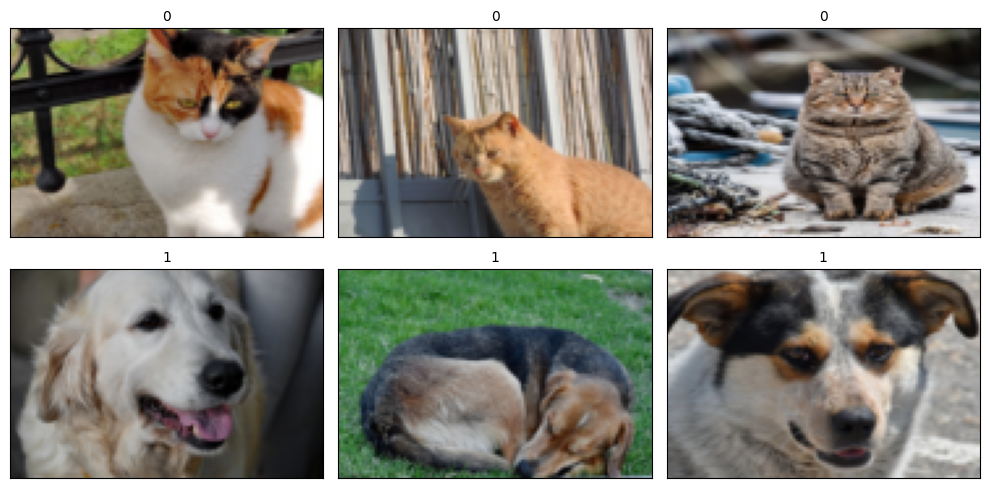

In [ ]:
fig = plt.figure(figsize=(10,5))
for i,example in enumerate(image_dataset):
  ax = fig.add_subplot(2,3,i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(example[1], size = 10)
  ax.imshow(example[0].numpy().transpose(1,2,0))
  plt.tight_layout()
plt.show()